# Project overview

StackOverflow database (a real Q&A service about programming), where data of posts within 2008 is stored. In this project, you need to write several SQL queries. The necessary data is located tables of the stackoverflow ER-diagram.

# ER-diagram of database

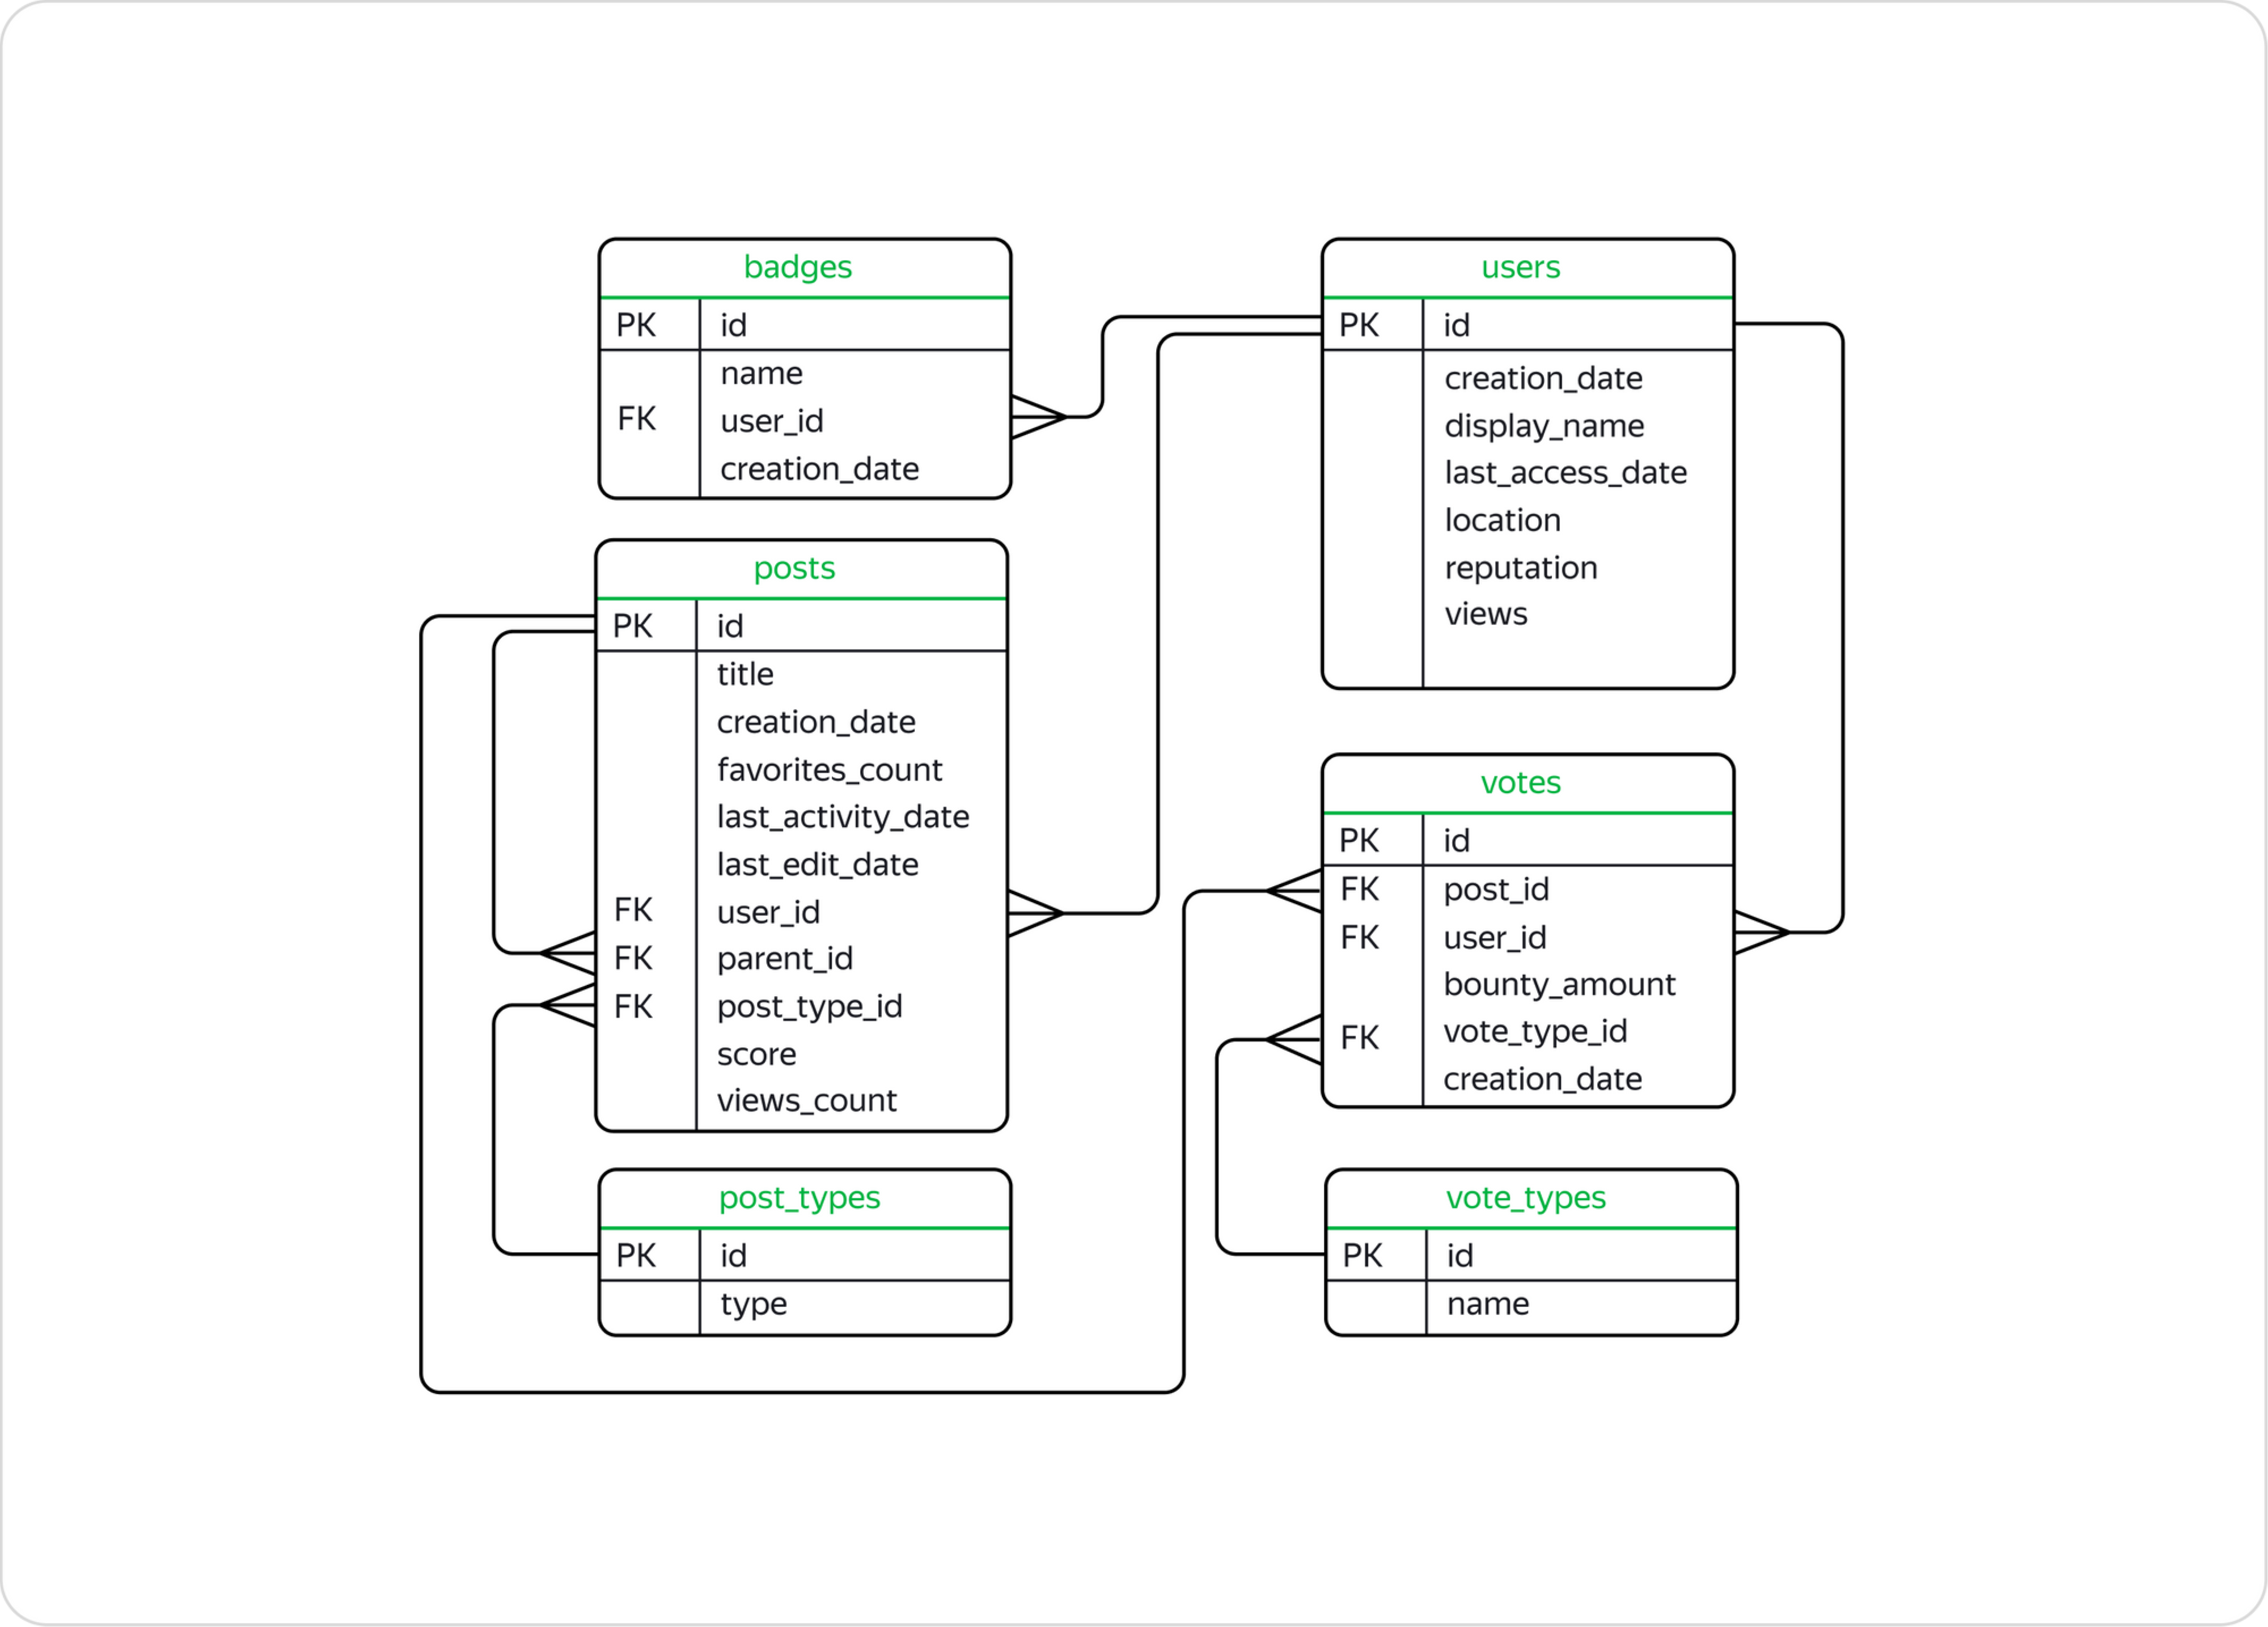

**Project navigation:**

1. [Calculate number of questions](#1.-Calculate-number-of-questions-which-have-scored-more-than-300-points-or-have-been-added-to-'favorites'-at-least-100-times.)
2. [How many questions were asked on average per day](#2.-How-many-questions-were-asked-on-average-per-day-from-November-1-to-November-18,-2008-inclusive?-Round-the-result-to-an-integer.)
3. [How many users received badges at day of registration? Display number of unique users.](#3.-How-many-users-received-badges-at-day-of-registration?-Display-number-of-unique-users.)
4. [How many unique posts which were created by user name Joel Coehoorn](#4.-How-many-unique-posts-which-were-created-by-user-name-Joel-Coehoorn-have-received-at-least-one-vote?)
5. [Querying all fields of vote_types table](#5.-Querying-all-fields-of-vote_types-table.-Add-rank-field-to-the-table,-which-includes-descending-sequence.-Table-should-be-sorted-by-id.)
6. [Select 10 users who most vote to Close type](#6.-Select-10-users-who-most-vote-to-Close-type.-Display-a-table-with-two-fields:-user-ID-and-number-of-votes.-Sort-number-of-votes-in-descending-sequence-,-then-user-ID---as-well,-in-descending-sequence.)
7. [Select 10 users by number of badges received between November 15 and December 15, 2008 inclusive.](#7.-Select-10-users-by-number-of-badges-received-between-November-15-and-December-15,-2008-inclusive.)
8. [How many points does each user's post get on average?](#8.-How-many-points-does-each-user's-post-get-on-average?)
9. [Display titles of posts which were written by users who received more than 1000 badges](#9.-Display-titles-of-posts-which-were-written-by-users-who-received-more-than-1000-badges.-Posts-without-titles-should-not-be-included-in-list.)
10. [Write query which download user data from Canada](#10.-Write-query-which-download-user-data-from-Canada.-Divide-users-into-three-groups-depending-on-number-of-views-of-their-profiles:)
11. [Display leaders of each group — users who scored maximum number of views in their group.](#11.-Complete-previous-request.-Display-leaders-of-each-group-—-users-who-scored-maximum-number-of-views-in-their-group.-Print-fields-with-user-ID,-group,-and-number-of-views.-Sort-table-by-views-in-descending-sequence,-and-then-by-ID-in-ascending-sequence.)
12. [Calculate daily increase in new users in November 2008](#12.-Calculate-daily-increase-in-new-users-in-November-2008.-Create-table-with-fields:)
13. [For each user who has written at least one post, find interval between registration and time of first post creation.](#13.-For-each-user-who-has-written-at-least-one-post,-find-interval-between-registration-and-time-of-first-post-creation.-Display:)
14. [Display total number of views for posts published in each month of 2008](#14.-Display-total-number-of-views-for-posts-published-in-each-month-of-2008.-If-there-is-no-data-for-any-month-in-database,-you-can-skip-this-month.-Sort-result-by-total-number-of-views-in-descending-sequence.)
15. [Display names of the most active users who gave more than 100 responses in the first month after registration](#15.-Display-names-of-the-most-active-users-who-gave-more-than-100-responses-in-the-first-month-after-registration-(including-day-of-registration).-Skip-questions-that-users-have-asked.-For-each-user-name,-display-number-of-unique-id.-Sort-result-by-user-names-in-lexicographic-sequence.)
16. [Display number of posts during 2008 by month](#16.-Display-number-of-posts-during-2008-by-month.-Select-posts-of-users-who-registered-in-September-2008-and-made-at-least-one-post-in-December-of-same-year.-Sort-data-by-month-in-descending-sequence.)
17. [Using post data, display several fields:](#17.-Using-post-data,-display-several-fields:)
18. [On average, how many days did users interact with platform during the period from December 1 to December 7, 2008 inclusive?](#18.-On-average,-how-many-days-did-users-interact-with-platform-during-the-period-from-December-1-to-December-7,-2008-inclusive?-Select-days-for-each-user-within-which-he-or-she-published-at-least-one-post.-You-need-to-get-a-single-integer-—-do-not-forget-to-round-the-result.)
19. [How percent of number of posts changed monthly from September 1 to December 31, 2008?](#19.-How-percent-of-number-of-posts-changed-monthly-from-September-1-to-December-31,-2008?-Display-a-table-with-the-following-fields:)
20. [Find user who has published most number of posts since registration.](#20.-Find-user-who-has-published-most-number-of-posts-since-registration.-Display-data-of-his/her-activity-for-October-2008-in-the-following-way:)

In [1]:
# importing libraries
import pandas as pd
import sqlalchemy as sa
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# setting the parameters
db_config = {
    'user': 'praktikum_student', 
    'pwd': 'Sdf4$2;d-d30pp',
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, 
    'db': 'data-analyst-advanced-sql' 
    }
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

In [3]:
# save connector
engine = sa.create_engine(connection_string, connect_args={'sslmode':'require'})

In [4]:
# to execute SQL query, writing a function using Pandas
def get_sql_data(query:str, engine:sa.engine.base.Engine=engine) -> pd.DataFrame:
    '''Open connection, get data from sql, close connection'''
    with engine.connect() as con:
         return pd.read_sql(sql=sa.text(query), con = con)

# 1. Calculate number of questions which have scored more than 300 points or have been added to 'favorites' at least 100 times.

In [5]:
query = '''
SELECT COUNT(pt.type) AS questions_cnt
FROM stackoverflow.post_types pt
JOIN stackoverflow.posts p ON pt.id=p.post_type_id
WHERE type='Question' AND
score>300 OR favorites_count>=100
'''
get_sql_data(query)

questions_cnt
0           1355

# 2. How many questions were asked on average per day from November 1 to November 18, 2008 inclusive? Round the result to an integer.

In [6]:
query = '''
SELECT ROUND(COUNT(pt.type)::numeric/18)
FROM stackoverflow.posts p
JOIN stackoverflow.post_types pt ON p.post_type_id=pt.id
WHERE pt.type='Question' AND
(p.creation_date)::date BETWEEN '2008-11-01' AND '2008-11-18'
'''
get_sql_data(query)

round
0  383.0

# 3. How many users received badges at day of registration? Display number of unique users.

In [7]:
query = '''
SELECT COUNT(DISTINCT u.id)
FROM stackoverflow.users u
JOIN stackoverflow.badges b ON u.id=b.user_id
WHERE u.creation_date::date=b.creation_date::date
'''
get_sql_data(query)

count
0   7047

# 4. How many unique posts which were created by user name Joel Coehoorn have received at least one vote?

In [8]:
query = '''
SELECT COUNT(DISTINCT p.id)
from stackoverflow.posts p
join stackoverflow.users u ON p.user_id=u.id
join stackoverflow.votes v ON p.id=v.post_id
WHERE u.display_name like '%Joel Coehoorn%'
'''
get_sql_data(query)

count
0     12

# 5. Querying all fields of vote_types table. Add rank field to the table, which includes descending sequence. Table should be sorted by id.

In [9]:
query = '''
SELECT *,
       ROW_NUMBER()OVER(ORDER BY id DESC) AS rank
from stackoverflow.vote_types
ORDER BY id
'''
get_sql_data(query)

id                   name  rank
0    1   AcceptedByOriginator    15
1    2                  UpMod    14
2    3                DownMod    13
3    4              Offensive    12
4    5               Favorite    11
5    6                  Close    10
6    7                 Reopen     9
7    8            BountyStart     8
8    9            BountyClose     7
9   10               Deletion     6
10  11             Undeletion     5
11  12                   Spam     4
12  13        InformModerator     3
13  14        ModeratorReview     2
14  15  ApproveEditSuggestion     1

# 6. Select 10 users who most vote to Close type. Display a table with two fields: user ID and number of votes. Sort number of votes in descending sequence , then  user ID - as well, in descending sequence.

In [10]:
query = '''
SELECT u.id AS users,
       COUNT(vt.name) AS votes_cnt
FROM stackoverflow.users u
JOIN stackoverflow.votes v ON u.id=v.user_id
JOIN stackoverflow.vote_types vt ON v.vote_type_id=vt.id
WHERE name = 'Close'
GROUP BY users 
ORDER BY votes_cnt DESC, users DESC
LIMIT 10
'''
get_sql_data(query)

users  votes_cnt
0  20646         36
1  14728         36
2  27163         29
3  41158         24
4  24820         23
5   9345         23
6   3241         23
7  44330         20
8  38426         19
9  19074         19

# 7. Select 10 users by number of badges received between November 15 and December 15, 2008 inclusive.

Display several fields:
- user ID;
- number of badges;
- rank in rating — more badges, higher rating.

Assign same place in rating list to users who have scored same number of badges.
Sort entries by the number of badges in descending sequence, and then user ID - in ascending sequance.

In [11]:
query = '''
SELECT u.id as users,
       COUNT(b.id) AS budges_cnt,
       DENSE_RANK()OVER(ORDER BY COUNT(b.id) DESC) AS rn
FROM stackoverflow.users u
JOIN stackoverflow.badges b ON u.id=b.user_id
WHERE b.creation_date::date BETWEEN '2008-11-15' AND '2008-12-15'
GROUP BY users
LIMIT 10
'''
get_sql_data(query)

users  budges_cnt  rn
0  22656         149   1
1  34509          45   2
2   1288          40   3
3   5190          31   4
4  13913          30   5
5    893          28   6
6  10661          28   6
7  33213          25   7
8  12950          23   8
9  25222          20   9

# 8. How many points does each user's post get on average?

Create a table with following fields:
- post title;
- user ID;
- number of points per user;
- average number of user points per post, rounded to integer.

Do not add posts without a title, as well as posts scored zero points.

title_post    users  user_score  \
0                Diagnosing Deadlocks in SQL Server 2005        1          82   
1                How do I calculate someone's age in C#?        1        1743   
2      Why doesn't IE7 copy <pre><code> blocks to the...        1          37   
3                          Calculate relative time in C#        1        1348   
4      Wrapping StopWatch timing with a delegate or l...        1          92   
...                                                  ...      ...         ...   
47349            Multi-lingual projects in Visual Studio  3742716           1   
47350  Change datatype when importing Excel file into...  3930756           5   
47351  How to host a Silverlight app in a Sharepoint ...  4020932           8   
47352  Getting counts for a paged SQL search stored p...  5696608           2   
47353  Reuse of SQL stored procedures across applicat...  5696608           2   

       avg_score  
0          573.0  
1          573.0  
2          573.0  
3          573.0  
4          573.0  
...          ...  
47349        1.0  
47350        5.0  
47351        8.0  
47352        2.0  
47353        2.0  

[47354 rows x 4 columns]

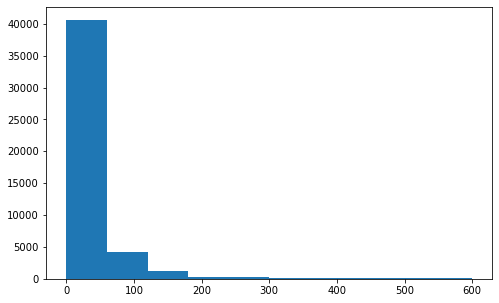

In [12]:
query = '''
SELECT p.title as title_post,
       u.id as users,
       p.score as user_score,
       ROUND(AVG(p.score)OVER(partition by u.id)) AS avg_score
FROM stackoverflow.users u
JOIN stackoverflow.posts p ON u.id=p.user_id
WHERE p.title IS NOT NULL AND p.score !=0
'''
display(get_sql_data(query))

get_sql_data(query)['avg_score'].hist(bins=10, range=(0,600), grid=False, figsize=(8,5))
plt.show()

Avg score per 1 post of unique user mostly distributes till 50.

# 9. Display titles of posts which were written by users who received more than 1000 badges. Posts without titles should not be included in list.

In [13]:
query = '''
SELECT p.title AS post_title
FROM stackoverflow.posts p
JOIN stackoverflow.users u ON p.user_id=u.id
JOIN stackoverflow.badges b ON u.id=b.user_id
WHERE p.title is not null
GROUP by post_title
HAVING count(b.id)>1000
'''

pd.set_option('display.max_colwidth', None)
get_sql_data(query)

post_title
0                         Project management to go with GitHub
1                 What are the correct version numbers for C#?
2     What's the hardest or most misunderstood aspect of LINQ?
3  What's the strangest corner case you've seen in C# or .NET?

# 10. Write query which download user data from Canada. Divide users into three groups depending on number of views of their profiles:

- assign group 1 to users with more than or equal to 350 views;
- users with fewer than 350 views, but more than or equal to 100 — group 2;
- for users with fewer than 100 views, group 3.

Display user ID, number of profile views, group in summary table. Users with less than or equal to zero views should not be included in final table.

id  views  group
0        22   1079      1
1        34   1707      1
2        37    757      1
3        41    174      2
4        42   1063      1
..      ...    ...    ...
832  431315    103      2
833  266220     13      3
834  474548     24      3
835  455635     17      3
836  476101    107      2

[837 rows x 3 columns]

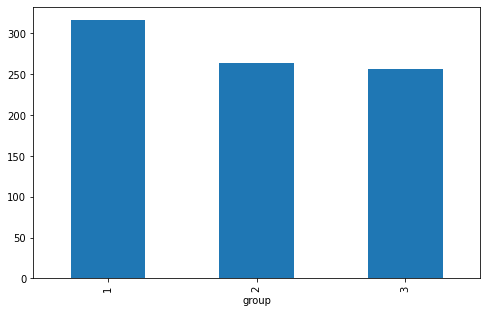

In [14]:
query = '''
SELECT id,
       views,
       (CASE
           WHEN views >= 350 THEN 1
           WHEN views >= 100 THEN 2
           WHEN views < 100 THEN 3
       END) AS group
FROM stackoverflow.users
WHERE location LIKE '%Canada%'
AND views>0
'''
display(get_sql_data(query))

get_sql_data(query).groupby('group')['id'].count().plot(kind='bar', figsize=(8,5))
plt.show()

1st group of users who has more than 350 views is majority in Canada.

# 11. Complete previous request. Display leaders of each group —  users who scored maximum number of views in their group. Print fields with user ID, group, and number of views. Sort table by views in descending sequence, and then by ID in ascending sequence.

In [15]:
query = '''
WITH A as (SELECT id,
                   views,
                   (CASE
                       WHEN views >= 350 THEN 1
                       WHEN views >= 100 THEN 2
                       WHEN views < 100 THEN 3
                   END) AS groups
            FROM stackoverflow.users
            WHERE location LIKE '%Canada%'
            AND views>0),
     B AS  (SELECT *,
                  MAX(views)OVER(PARTITION BY groups ORDER BY views DESC,id) AS max_views
           FROM A) 
SELECT id, views, groups
from B
WHERE views=max_views
'''
get_sql_data(query)

id  views  groups
0    3153  21991       1
1   46981    349       2
2    3444     99       3
3   22273     99       3
4  190298     99       3

# 12.Calculate daily increase in new users in November 2008. Create table with fields:
- number of day;
- number of users registered on that day;
- cumulative number of users.

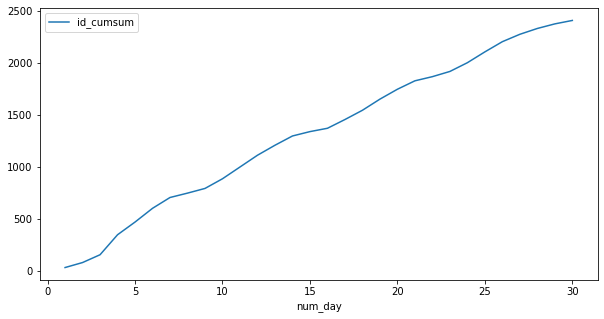

80

In [16]:
query = '''
SELECT EXTRACT(DAY FROM creation_date) as num_day,
       COUNT(DISTINCT id) AS id_cnt,
       SUM(COUNT(DISTINCT id))OVER(ORDER BY EXTRACT(DAY FROM creation_date))::int AS id_cumsum
FROM stackoverflow.users
WHERE creation_date::date BETWEEN '2008-11-01' AND '2008-11-30'
GROUP BY EXTRACT(DAY FROM creation_date)
'''
get_sql_data(query).plot(x='num_day',y='id_cumsum', figsize=(10,5))
plt.show()

round((get_sql_data(query).groupby('num_day')['id_cnt'].mean()).mean())

Daily growth of new user dueing November, 2008 is 80 users per day. Growth during a month shows linear continuously uptrend.

# 13. For each user who has written at least one post, find interval between registration and time of first post creation. Display:
- user ID;
- time difference between registration and first post.

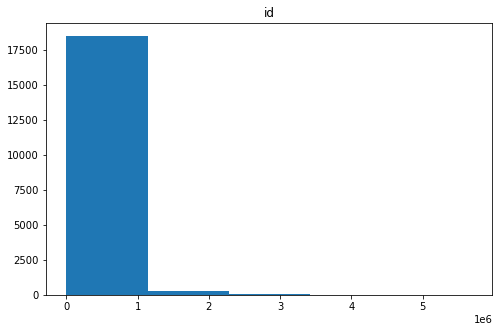

In [17]:
query = '''
with help as (SELECT user_id,creation_date,
row_number() over (partition by user_id order by creation_date )
FROM stackoverflow.posts
order by user_id, creation_date)

SELECT id,
(help.creation_date - users.creation_date) as delta
FROM help
JOIN stackoverflow.users ON help.user_id = users.id
where row_number = 1
'''
get_sql_data(query).hist(bins=5, grid=False, figsize=(8,5))
plt.show()

Vast majority of users creates posts within 1st day after their registration.

# 14. Display total number of views for posts published in each month of 2008. If there is no data for any month in database, you can skip this month. Sort result by total number of views in descending sequence.

In [25]:
query = '''
SELECT DATE_TRUNC('month', creation_date)::date AS month_published,
       SUM(views_count) AS total_views
FROM stackoverflow.posts
WHERE views_count IS NOT NULL
GROUP BY DATE_TRUNC('month', creation_date)::date
ORDER BY total_views DESC
'''
get_sql_data(query)

month_published  total_views
0      2008-09-01    452928568
1      2008-10-01    365400138
2      2008-11-01    221759651
3      2008-12-01    197792841
4      2008-08-01    131367083
5      2008-07-01       669895

# 15. Display names of the most active users who gave more than 100 responses in the first month after registration (including day of registration). Skip questions that users have asked. For each user name, display number of unique id. Sort result by user names in lexicographic sequence.

In [26]:
query = '''
SELECT u.display_name AS user_name,
       COUNT(DISTINCT u.id) AS id_cnt
FROM stackoverflow.users u
join stackoverflow.posts p ON u.id=p.user_id
join stackoverflow.post_types pt ON p.post_type_id=pt.id
WHERE pt.type='Answer' AND p.creation_date::date BETWEEN u.creation_date::date AND (u.creation_date::date + INTERVAL '1 month')
GROUP BY user_name
HAVING COUNT(pt.type)>100
ORDER BY user_name
'''
get_sql_data(query)

user_name  id_cnt
0   1800 INFORMATION       1
1      Adam Bellaire       1
2         Adam Davis       1
3          Adam Liss       1
4               Alan       8
..               ...     ...
74            lomaxx       1
75          mattlant       1
76         paxdiablo       1
77        tvanfosson       1
78              tzot       1

[79 rows x 2 columns]

# 16. Display number of posts during 2008 by month. Select posts of users who registered in September 2008 and made at least one post in December of same year. Sort data by month in descending sequence.

In [20]:
query = '''
with help as (select user_id as answer
from stackoverflow.posts
JOIN stackoverflow.users on posts.user_id = users.id
where posts.creation_date::date between '2008-12-01' and '2008-12-31'
and users.creation_date::date between '2008-09-01' and '2008-09-30')

select date_trunc('month', creation_date)::date, count(distinct posts.id) as answer2
from stackoverflow.posts
join help on posts.user_id = help.answer
where (creation_date::date between '2008-01-01' and '2008-12-31')
group by date_trunc('month', creation_date)::date
order by date_trunc('month', creation_date)::date desc
'''
get_sql_data(query)

date_trunc  answer2
0  2008-12-01    17641
1  2008-11-01    18294
2  2008-10-01    27171
3  2008-09-01    24870
4  2008-08-01       32

# 17. Using post data, display several fields:
- ID of users who published post;
- date of post creation;
- number of views of current post;
- cumulative amount of views of author's posts.

Data should be sorted bu id in ascending sequence, data about same user should be sorted by ost creation date in ascending sequence.

In [21]:
query = '''
SELECT user_id, creation_date, views_count,
       SUM (views_count) OVER (PARTITION BY user_id ORDER BY creation_date) AS cumulative_count
FROM stackoverflow.posts
ORDER BY user_id, creation_date;
'''
get_sql_data(query)

user_id       creation_date  views_count  cumulative_count
0             1 2008-07-31 23:41:00       480476            480476
1             1 2008-07-31 23:55:38       136033            616509
2             1 2008-07-31 23:56:41            0            616509
3             1 2008-08-04 02:45:08            0            616509
4             1 2008-08-04 04:31:03            0            616509
...         ...                 ...          ...               ...
243791  5696608 2008-12-23 16:00:37            0              2804
243792  5696608 2008-12-23 17:35:09            0              2804
243793  5696608 2008-12-24 01:02:48            0              2804
243794  5696608 2008-12-30 14:34:45            0              2804
243795  5696608 2008-12-30 16:32:12            0              2804

[243796 rows x 4 columns]

# 18. On average, how many days did users interact with platform during the period from December 1 to December 7, 2008 inclusive? Select days for each user within which he or she published at least one post. You need to get a single integer — do not forget to round the result.

In [22]:
query = '''
with help as (select user_id,
              count(distinct creation_date::date) as answer
              from stackoverflow.posts
              where creation_date::date between '2008-12-01' and '2008-12-07'
              group by user_id)

SELECT round(avg (answer)) as avg_answer
FROM help 
'''
get_sql_data(query)

avg_answer
0         2.0

# 19. How percent of number of posts changed monthly from September 1 to December 31, 2008? Display a table with the following fields:
- number of month.
- number of posts per month.
- percentage which shows how number of posts has changed in the current month compared to the previous one.

If there are fewer posts, percentage should be negative, if increased — positive. Round percentage value to 2 decimal.

In [23]:
query = '''
WITH posts_cnt as (SELECT DATE_TRUNC('month', creation_date)::date AS month_num,
                          COUNT(DISTINCT id) AS posts_num
                   FROM stackoverflow.posts
                   WHERE creation_date::date BETWEEN '2008-09-01' AND '2008-12-31'
                   GROUP BY DATE_TRUNC('month', creation_date)::date)
SELECT EXTRACT(MONTH FROM month_num) as num_month,
       posts_num,
       ROUND((posts_num::numeric/LAG(posts_num)OVER()-1::numeric)*100,2) as share_change
FROM posts_cnt
'''
get_sql_data(query)

num_month  posts_num  share_change
0        9.0      70371           NaN
1       10.0      63102        -10.33
2       11.0      46975        -25.56
3       12.0      44592         -5.07

# 20. Find user who has published most number of posts since registration. Display data of his/her activity for October 2008 in the following way:
- number of week;
- date and time of last post published at same week.

In [24]:
query = '''
WITH active_user AS
(
SELECT user_id,
       COUNT(id)
FROM stackoverflow.posts
GROUP BY user_id
ORDER BY COUNT(id) DESC
LIMIT 1
)
SELECT EXTRACT(WEEK FROM p.creation_date)::int AS week_creation,
       MAX(p.creation_date) AS creation_date
FROM active_user AS au
JOIN stackoverflow.posts AS p
ON au.user_id=p.user_id
WHERE DATE_TRUNC('month', p.creation_date)::date = '2008-10-01'
GROUP BY week_creation;
'''
get_sql_data(query)

week_creation       creation_date
0             40 2008-10-05 09:00:58
1             41 2008-10-12 21:22:23
2             42 2008-10-19 06:49:30
3             43 2008-10-26 21:44:36
4             44 2008-10-31 22:16:01